# Assignment 2: Ensemble Methods and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**


## Name: Eesun Moon
## UNI: em3907


## Dataset Description: Bank Marketing Dataset

This dataset contains information about direct marketing campaigns (phone calls) of a banking institution. The goal is to predict whether the client will subscribe to a term deposit. The details of the features and target are listed below:

**Features**:
- `age`: Age of the client
- `job`: Type of job
- `marital`: Marital status
- `education`: Education level
- `default`: Has credit in default?
- `balance`: Average yearly balance
- `housing`: Has housing loan?
- `loan`: Has personal loan?
- `contact`: Contact communication type
- `day`: Last contact day of the month
- `month`: Last contact month of year
- `duration`: Last contact duration in seconds
- `campaign`: Number of contacts performed during this campaign
- `pdays`: Number of days since the client was last contacted from a previous campaign
- `previous`: Number of contacts performed before this campaign
- `poutcome`: Outcome of the previous marketing campaign
- `deposit`: Has the client subscribed to a term deposit? (target)

**Objective**: The target variable (`deposit`) is binary (yes/no), and the goal is to predict whether a client will subscribe to a term deposit based on the given features.



In [1]:
## Use this cell to import necessary packages
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, f1_score, brier_score_loss
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

## Question 1: Decision Trees


**1.1: Load the Bank Marketing Dataset and inspect its structure.**
- Hint: Inspect columns and types.


In [2]:
## YOUR CODE HERE
bank_df = pd.read_csv('/content/bank.csv')

print("DESCRIBE DATASET")
print(bank_df.describe())
print()

print("INFO DATABASE")
print(bank_df.info())
print()

print("COLUMNS INFO")
bank_df_columns = bank_df.columns
print(bank_df_columns)
print(bank_df.head())

DESCRIBE DATASET
                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000


**1.2: Are there any missing values in the dataset? If yes, how do you plan to handle them?**


In [3]:
cat_columns = bank_df.select_dtypes(include=['object']).columns
num_columns = bank_df.select_dtypes(include=['int64']).columns

print('Categorical columns:', cat_columns.values)
print('Numberical columns:', num_columns.values)

Categorical columns: ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'deposit']
Numberical columns: ['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']


In [4]:
## YOUR CODE HERE

print("UNIQUE VALUES BY COLUMNS")
for column in bank_df_columns:
  print("column:", column)
  print(bank_df[column].unique())

UNIQUE VALUES BY COLUMNS
column: age
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
column: job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
column: marital
['married' 'single' 'divorced']
column: education
['secondary' 'tertiary' 'primary' 'unknown']
column: default
['no' 'yes']
column: balance
[2343   45 1270 ... 1594 2593 -134]
column: housing
['yes' 'no']
column: loan
['no' 'yes']
column: contact
['unknown' 'cellular' 'telephone']
column: day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
column: duration
[1042 1467 1389 ... 1504  818 1812]
column: campaign
[ 1 

Q: Are there any missing values in the dataset? If yes, how do you plan to handle them?


A: Initially, I considered 'unknown' values in categorical features and negative values in numerical features as missing values. As a result, I replaced 'unknown' values in categorical features with the mode and negative values in numerical features with the mean. However, after analyzing the dataset description, I found that the 'unknown' values could represent "information not available," and negative values in the balance feature could indeed reflect a negative balance. Additionally, in the case of the 'pdays' features, a value of -1 indicates that the client was not previously contacted, meaning these values are not missing. Therefore, **in this task, there are no missing values in the datasdet**.

<!-- There are not missing values in the dataset. categorical feature에서 'unknown'과 numerical feature에서 negative 값을 가질 때 missing value라고 간주해서, categorical feature는 최빈값으로 numerical value는 평균값으로 missing value를 채웠었다. 하지만, 알지 못한다의 뜻으로 'unknown' value가 있을 수 있고, balance도 negative balance가 있을 수 있으며, client was not previously contcted 경우에 pdays가 -1이 될 수 있기 때문에 missing value가 아니다. 따라서 이번 task에서 missing value가 없다. -->

In [5]:
# Filling missing value - previous (before analyzing the dataset description)

"""
# Fill missing value - (1) Count missing values
cat_null = []
num_null = []

print("The number of NULL VALUE")
for column in bank_df_columns:
  if bank_df[column].dtype == 'object':
    null_cnt = len(bank_df.loc[bank_df[column]=='unknown', column])
    if null_cnt !=0:
      cat_null.append(column)
  else:
    null_cnt = len(bank_df.loc[bank_df[column] < 0, column])
    if null_cnt !=0:
      num_null.append(column)
  print(column, null_cnt, bank_df[column].dtype)

print("Null categorical columns:", cat_null)
print("Null numerical columns:", num_null)


# Fill missing value - (2) Convert missing value to Nan value

bank_df.replace('unknown', np.nan, inplace=True) # categorical feature

for col in num_columns:
  bank_df.loc[bank_df[col] <0, col] = np.nan

print(bank_df.info())


# Fill missing value - (3) simple imputer

imputer_cat = SimpleImputer(strategy="most_frequent")
bank_df[cat_null] = imputer_cat.fit_transform(bank_df[cat_null])

imputer_num = SimpleImputer(strategy="mean")
bank_df[num_null] = imputer_num.fit_transform(bank_df[num_null])

print(bank_df.isna().sum())
print(bank_df.info())
print(bank_df.shape)

"""

'\n# Fill missing value - (1) Count missing values\ncat_null = []\nnum_null = []\n\nprint("The number of NULL VALUE")\nfor column in bank_df_columns:\n  if bank_df[column].dtype == \'object\':\n    null_cnt = len(bank_df.loc[bank_df[column]==\'unknown\', column])\n    if null_cnt !=0:\n      cat_null.append(column)\n  else:\n    null_cnt = len(bank_df.loc[bank_df[column] < 0, column])\n    if null_cnt !=0:\n      num_null.append(column)\n  print(column, null_cnt, bank_df[column].dtype)\n\nprint("Null categorical columns:", cat_null)\nprint("Null numerical columns:", num_null)\n\n\n# Fill missing value - (2) Convert missing value to Nan value\n\nbank_df.replace(\'unknown\', np.nan, inplace=True) # categorical feature\n\nfor col in num_columns:\n  bank_df.loc[bank_df[col] <0, col] = np.nan\n\nprint(bank_df.info())\n\n\n# Fill missing value - (3) simple imputer\n\nimputer_cat = SimpleImputer(strategy="most_frequent")\nbank_df[cat_null] = imputer_cat.fit_transform(bank_df[cat_null])\n\nimp


**1.3: Plot side-by-side bars of class distribution for each categorical feature in the dataset with respect to the target variable (e.g., `job`, `marital`, `education`, etc.).**


categorical feature: ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'deposit']
the number of categorical features 10


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

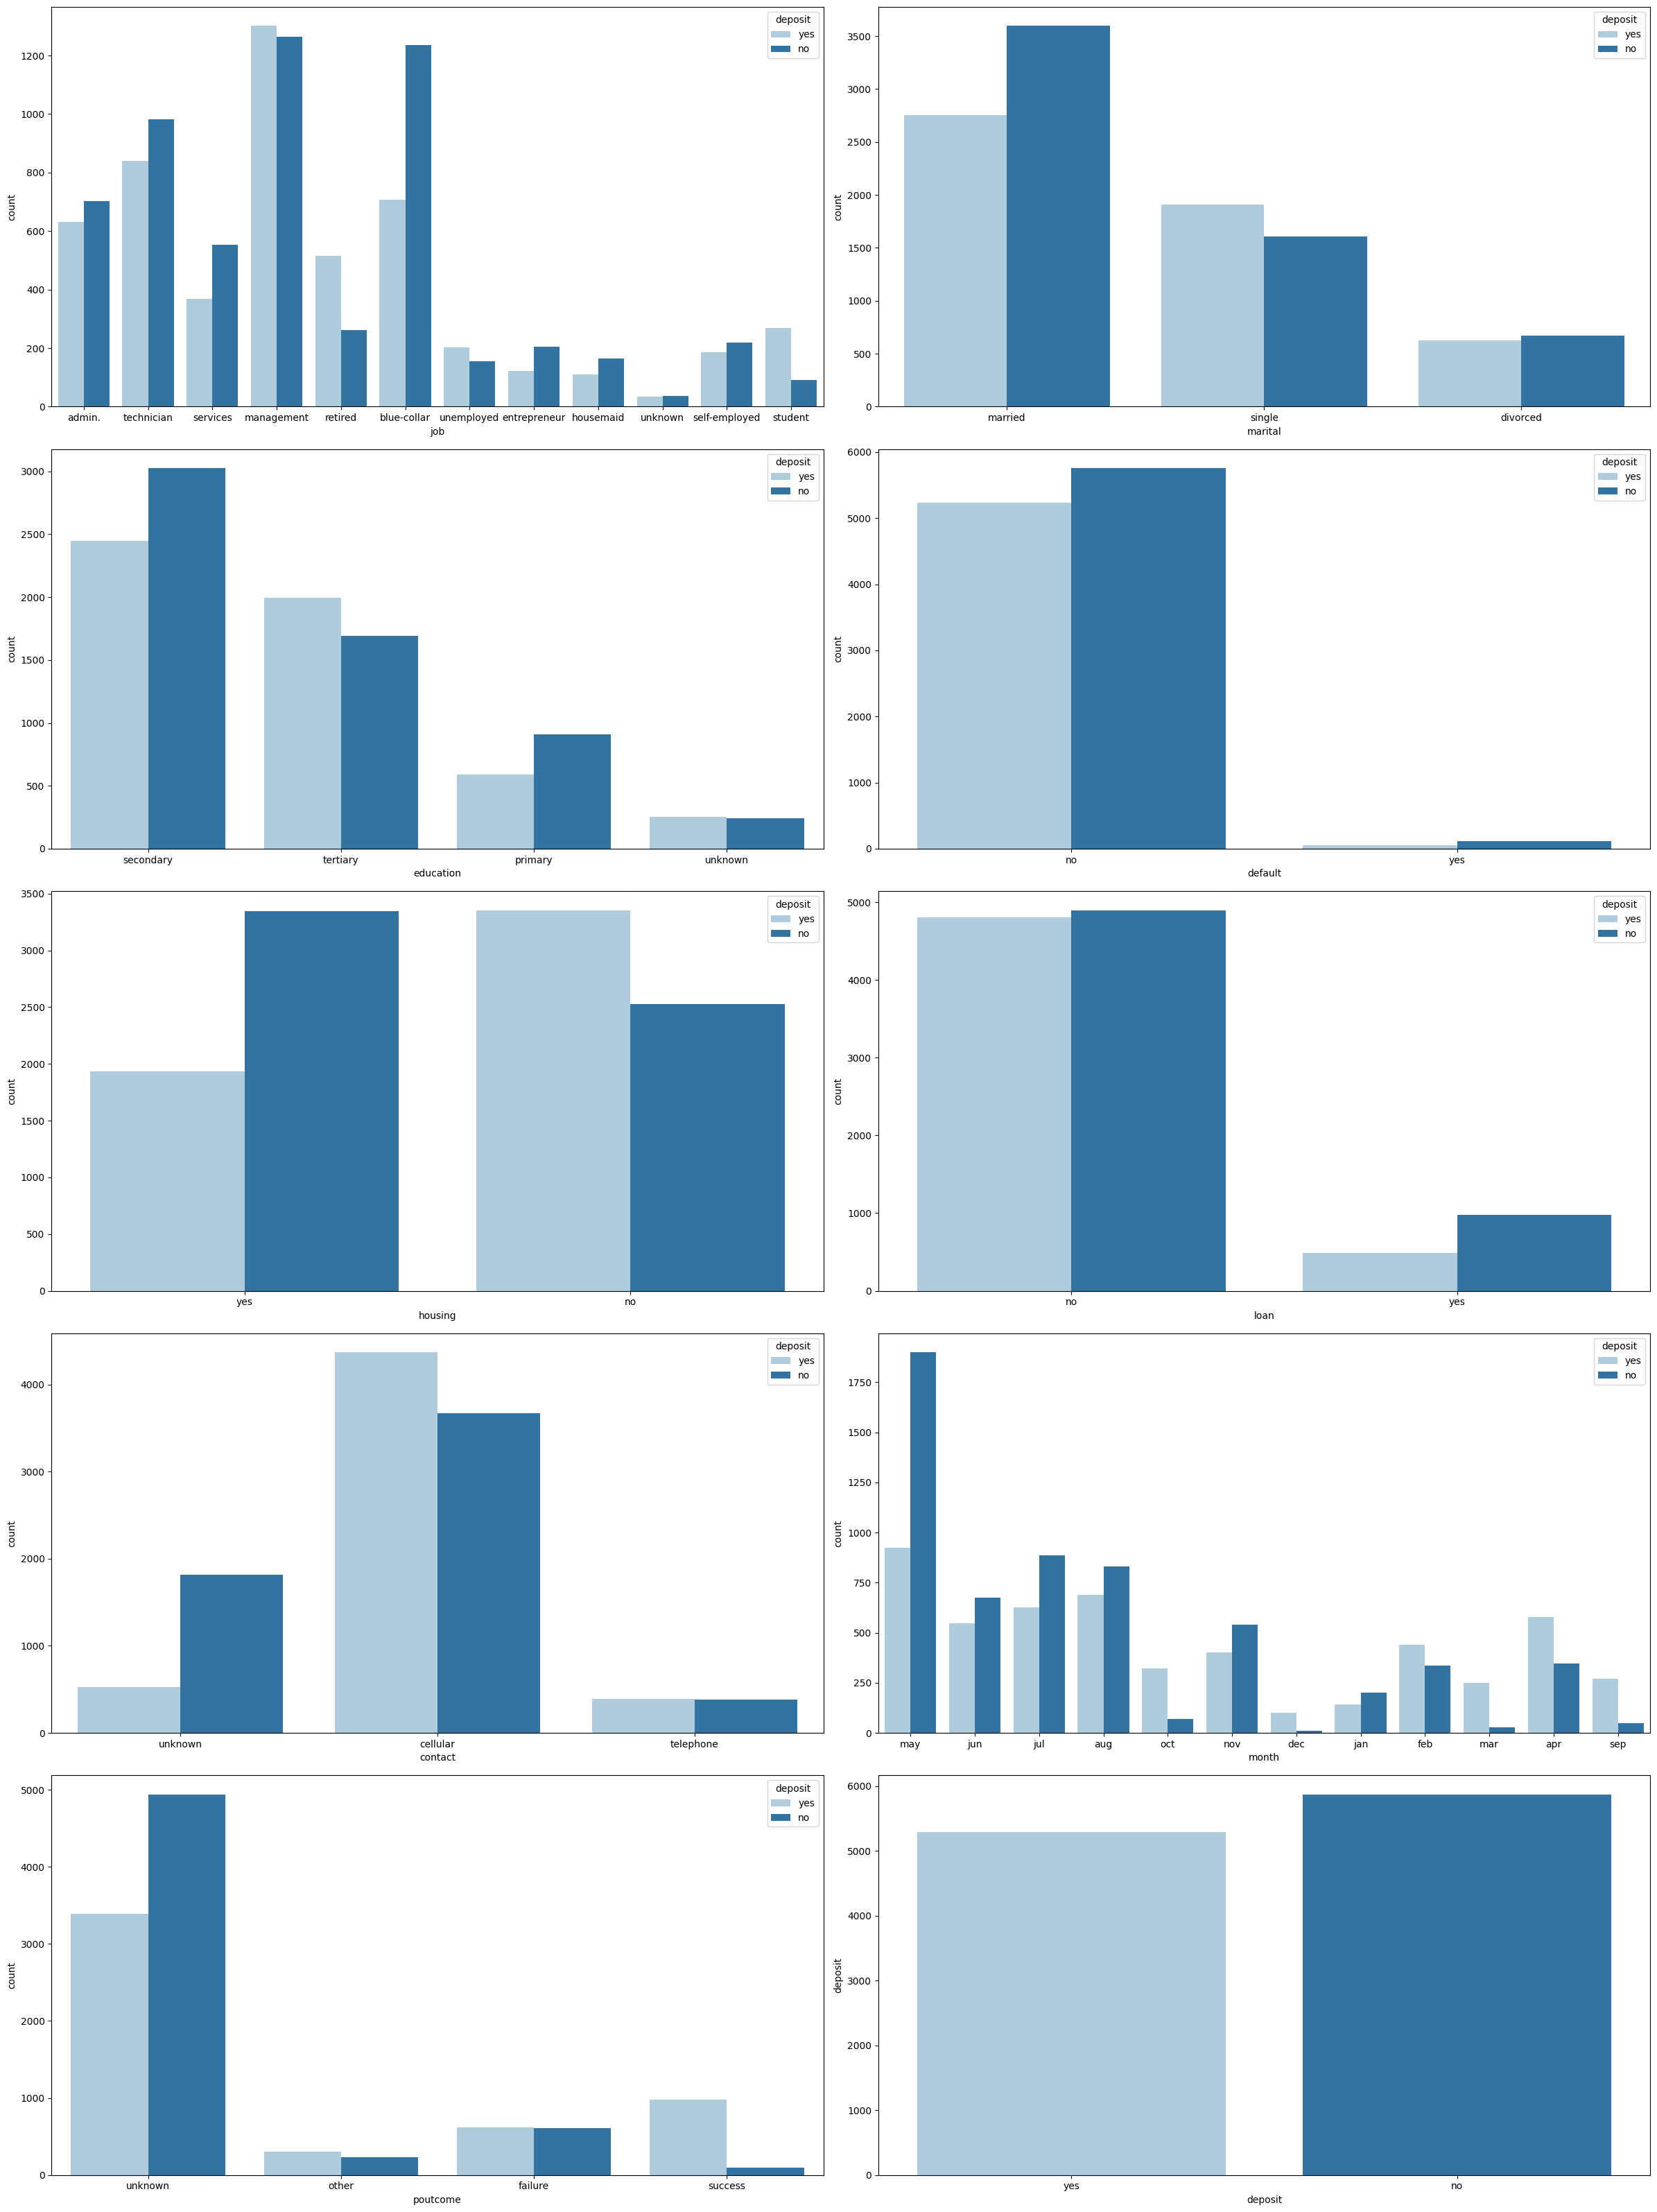

In [6]:
## YOUR CODE HERE
target_col = 'deposit'
print("categorical feature:", cat_columns.values)
print("the number of categorical features", len(cat_columns.values))

fig, axes = plt.subplots(len(cat_columns.values)//2,2, figsize=(24,32))

for var, subplot in zip(cat_columns, axes.flatten()):
  sns.countplot(data=bank_df, x=var, ax=subplot, hue=target_col, palette='Paired')
  plt.xlabel(var)
  plt.ylabel(target_col)

plt.tight_layout()

**1.4: Explain the distribution of the target variable and the dataset.**


deposit
no     5873
yes    5289
Name: count, dtype: int64
total data count: 11162

probability of categories
deposit
no     0.52616
yes    0.47384
Name: count, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='deposit', ylabel='count'>

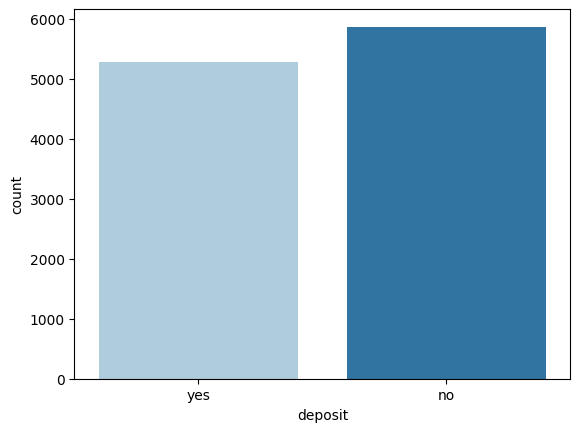

In [7]:
y_counts = pd.Series(bank_df['deposit'].value_counts())
print(y_counts)
print("total data count:",len(bank_df['deposit']))

probability = y_counts / len(bank_df['deposit'])
print("\nprobability of categories")
print(probability)

sns.countplot(data=bank_df, x='deposit', hue = 'deposit', palette='Paired')

## YOUR COMMENT HERE >> below !

Q: Explain the distribution of the target variable and the dataset

A: Given the distribution of the target variable, 'No' is 52.6% and 'Yes' 47.4%. This indicates that the dataset is not highly imbalanced, but it cannot be considered completely balanced either.

**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [8]:
# split feature data(X) and target data(y)

bank_X = bank_df.drop(columns=['deposit'])
bank_y = bank_df['deposit']

In [9]:
## YOUR CODE HERE
# split the data into development and test datasets.

bank_X_dev, bank_X_test, bank_y_dev, bank_y_test = train_test_split(bank_X, bank_y, test_size = 0.2, stratify = bank_y, random_state=42)
print(bank_X_dev.shape, bank_X_test.shape, bank_y_dev.shape, bank_y_test.shape)

(8929, 16) (2233, 16) (8929,) (2233,)


Q: Which splitting methodology did you choose and why?

A: As seen in the target category distribution above, while the dataset is not highly imbalanced, it also cannot be considered fully balanced. Addtionally, the distribution of the target variable across each feature category is not completely balanced. Therefore, unlike random splitting, which may not preserve the class ratio, stratified splitting ensures that the class ratio is maintained across both the development and test datasets. For this reason, **I chose to use the stratified splitting methodology when splitting the dataset**.
<!-- 위에서 보인 target category 별 distribution을 보면, dataset이 완전히 balanced하다고 할 수 없다. 또한 각 카테고리별 target variable의 비율도 완전히 balanced 하지 않다. 따라서 random하게 dataset을 split하는 random splitting 방법과 달리, stratified splitting은 development와 test datasets의 class ratio를 보장한다. 따라서 나는 dataset를 split할 때, stratified splitting methodology를 선택했다. -->

**1.6: Would you drop any column? Justify your reasoning.**

**Preprocess the data (Handle the Categorical Variable). Would you consider a mix of encoding techniques? Justify.
Do we need to apply scaling? Briefly Justify**



In [10]:
print('Categorical columns')
for column in cat_columns:
  print("column:", column)
  print(bank_df[column].unique())

print('Numerical columns')
print(bank_df.describe())

Categorical columns
column: job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
column: marital
['married' 'single' 'divorced']
column: education
['secondary' 'tertiary' 'primary' 'unknown']
column: default
['no' 'yes']
column: housing
['yes' 'no']
column: loan
['no' 'yes']
column: contact
['unknown' 'cellular' 'telephone']
column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
column: poutcome
['unknown' 'other' 'failure' 'success']
column: deposit
['yes' 'no']
Numerical columns
                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000   

In [11]:
# drop column

bank_X_dev.drop(columns=['contact'], inplace=True)
bank_X_test.drop(columns=['contact'], inplace=True)

Q: Would you drop any column? Justify your reasoning.

A: I decided to drop the 'contact' column. Since our task is to determine whether a client will subscribe to a term deposit based on the given features, I assumed that the type of communication method ('contact') would not have a significant correlation with the outcome of whether a client subscribes to a deposit. Therefore, **I removed the 'contact' column**.
<!-- 나는 'contact' column을 drop했다. 우리의 task는 'whether a client will subscribe to a term deposit based on the given features.'이기 때문에 Dataset description을 보고 deposit의 여부가 communication type과는 상관관계가 없을 것이라고 판단해서 'contact' column을 제거했다. -->


Q: Preprocess the data (Handle the Categorical Variable). Would you consider a mix of encoding techniques? Justify. Do we need to apply scaling? Briefly Justify.

A: Categorical features must be converted to numerical values since machine learning models can only interpret numerical data. For the categorical features, the 'education' feature has ordinal categories ('unknown', 'primary', 'secondary', 'tertiary'-'unknown' signifies a lack of information, so I treated it as the lowest level in the order), while the rest of the features are non-ordinal categories. As a result, **I applied ordinal encoding to the 'education' feature and one-hot encoding to the other categorical features**.  

When examining the data using describe(), I noticed that the standard deviations of the 'balance', 'duration', and 'pdays' features are relatively high. Therefore, scaling would be typically beneficial. However, when using tree-based models, scaling is not necessary, as these models are scale-invariant. Thus, **scaling is not required if tree-based machine learning techniques are employed**.

For the target variable, which consists of two categories ('yes' and 'no'), **I simply applied label encoding**.

<!-- categorical feature는 'education' feature가 oridial category이고, 나머지는 'education' feature에는 ordial encoding을, 나머지 categorical feature에는 'one hot encoding'을 적용했다.
When deciding to use Tree-based models, such as these model do not require scaling due to their sclale-invariant characteristics. However, categorical feature should be convert to the numerical value in order that the model can understand only numerical values. target variable에는 label encoder를 적용했다
numerical feature의 분포(std)를 보기 위해 describe를 해보았을 때, numerical value에 scaling이 필요하다고 판단했다. 특히 'balance', 'duration', 'pdays' feature는 std가 높아서 scaling이 필요하다. 따라서 numerical value에는 scaler를 적용했다.  -->

**1.7: Fit a Decision Tree on the development data until all leaves are pure. Which scoring metric will you prefer, and why? What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

In [12]:
## YOUR CODE HERE

# numerical: num_columns
num_columns=['age','balance','day','duration','campaign','pdays','previous']
# scaler = StandardScaler()

# ordinal
ord_columns = ['education']
orders = [['unknown', 'primary','secondary','tertiary']]
ordial_encoder = OrdinalEncoder(categories = orders)

# one hot encoding
oh_columns = ['job', 'marital', 'default', 'housing', 'loan', 'month', 'poutcome']
oh_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

"""
preprocess = make_column_transformer((scaler, num_columns),
                                     (ordial_encoder, ord_columns),
                                     (oh_encoder, oh_columns),
                                     remainder='passthrough')
"""

preprocess = make_column_transformer((ordial_encoder, ord_columns),
                                     (oh_encoder, oh_columns),
                                     remainder='passthrough')

# target category
label_encoder = LabelEncoder()
bank_y_dev = label_encoder.fit_transform(bank_y_dev)
bank_y_test = label_encoder.transform(bank_y_test)


# model
dt_model = DecisionTreeClassifier(random_state = 42)

pipe = make_pipeline(preprocess, dt_model)

pipe.fit(bank_X_dev, bank_y_dev)

pred_dev = pipe.predict(bank_X_dev)
pred_test = pipe.predict(bank_X_test)

acc_dev = accuracy_score(bank_y_dev, pred_dev)
f1_dev = f1_score(bank_y_dev, pred_dev)
acc_test = accuracy_score(bank_y_test, pred_test)
f1_test = f1_score(bank_y_test, pred_test)

print("Dev Acc:", acc_dev)
print("Dev f1 score:", f1_dev)
print("Test Acc:", acc_test)
print("Test f1 score:", f1_test)

Dev Acc: 1.0
Dev f1 score: 1.0
Test Acc: 0.7725033587102552
Test f1 score: 0.7617260787992496


In [13]:
trained_dt = pipe.named_steps['decisiontreeclassifier']
trained_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

Q: Which scoring metric will you prefer, and why? What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.

A: The instruction to "fit a Decision Tree on the development data **until all leaves are pure**" suggests training the decision tree model to its maximum depth. This leads to overfitting, with both the accuracy and F1 score on the development dataset being 1.0. However, when evaluating the model on the test dataset, the performance is lower compared to the development set, indicating that the model has become too complex and is overfitting.

In terms of evaluation metrics, the accuracy score on the test dataset is approximately 77.25%, while the F1 score is around 76.17%. I believe that the F1 score is more appropriate that the accuracy score in this case. The F1 score is typically more suitable when dealing with imbalanced datasets. Even though I used stratified splitting to ensure balanced class ratios in both the development and test datasets, the F1 score remains a more robust metric in imbalanced scenarios, which is why I prefer it over accuracy.
<!-- The instruction that "fit a Decision Tree on the development data **until all leaves are pure**" implies that I train the decision tree model until it reach maximum depth. This also means that overfitting as well as both accuracy and f-1 score of the development dataset are 1.0. Given the performances of both development and test datasets, the test data's performance are lower than the development data's score while the development data's performances are 1.0, which means that the model is so complex, thus overfitting.
In terms of evaluation metrics, 이 경우에는 accuracy score가 약 77.25%, f1-score가 약 76.17%이다. I believed that F1 score would be more appropriate than Accuracy score. F1 score is typically suitable when the provided dataset is imbalanced. 따라서 stratified splitting으로 splitting했다고 하더라도, imbalnaced dataset에서 강인하게 scoring하는 f1 score를 나는 더 선호한다. -->

**1.8: Visualize the trained tree until the suitable max_depth.**

In [14]:
# split development dataset into dev, testidation
bank_X_train, bank_X_val, bank_y_train, bank_y_val = train_test_split(bank_X_dev, bank_y_dev, test_size = 0.25, stratify = bank_y_dev, random_state=42)
print(bank_X_train.shape, bank_X_val.shape, bank_y_train.shape, bank_y_val.shape)

# search suitable max_depth

hyper_parameter = [{"criterion" : ("gini","entropy"),
                    "max_depth": np.arange(1,21)}]

best_dt_model = GridSearchCV(dt_model, hyper_parameter,
                        return_train_score=True)

pipe = make_pipeline(preprocess, best_dt_model)

pipe.fit(bank_X_train, bank_y_train)

pred_train = pipe.predict(bank_X_train)
pred_val = pipe.predict(bank_X_val)

acc_train = accuracy_score(bank_y_train, pred_train)
f1_train = f1_score(bank_y_train, pred_train)
acc_val = accuracy_score(bank_y_val, pred_val)
f1_val = f1_score(bank_y_val, pred_val)

print("train Acc:", acc_train)
print("train f1 score:", f1_train)
print("val Acc:", acc_val)
print("val f1 score:", f1_val)

print("\n Suitable hyper parameter")
gridcv = pipe.named_steps['gridsearchcv']
print("Best Score:", gridcv.best_score_)
print("Best params:", gridcv.best_params_)

(6696, 15) (2233, 15) (6696,) (2233,)
train Acc: 0.8478195937873357
train f1 score: 0.8474322503368767
val Acc: 0.7931034482758621
val f1 score: 0.7903811252268602

 Suitable hyper parameter
Best Score: 0.7976403642727364
Best params: {'criterion': 'gini', 'max_depth': 8}


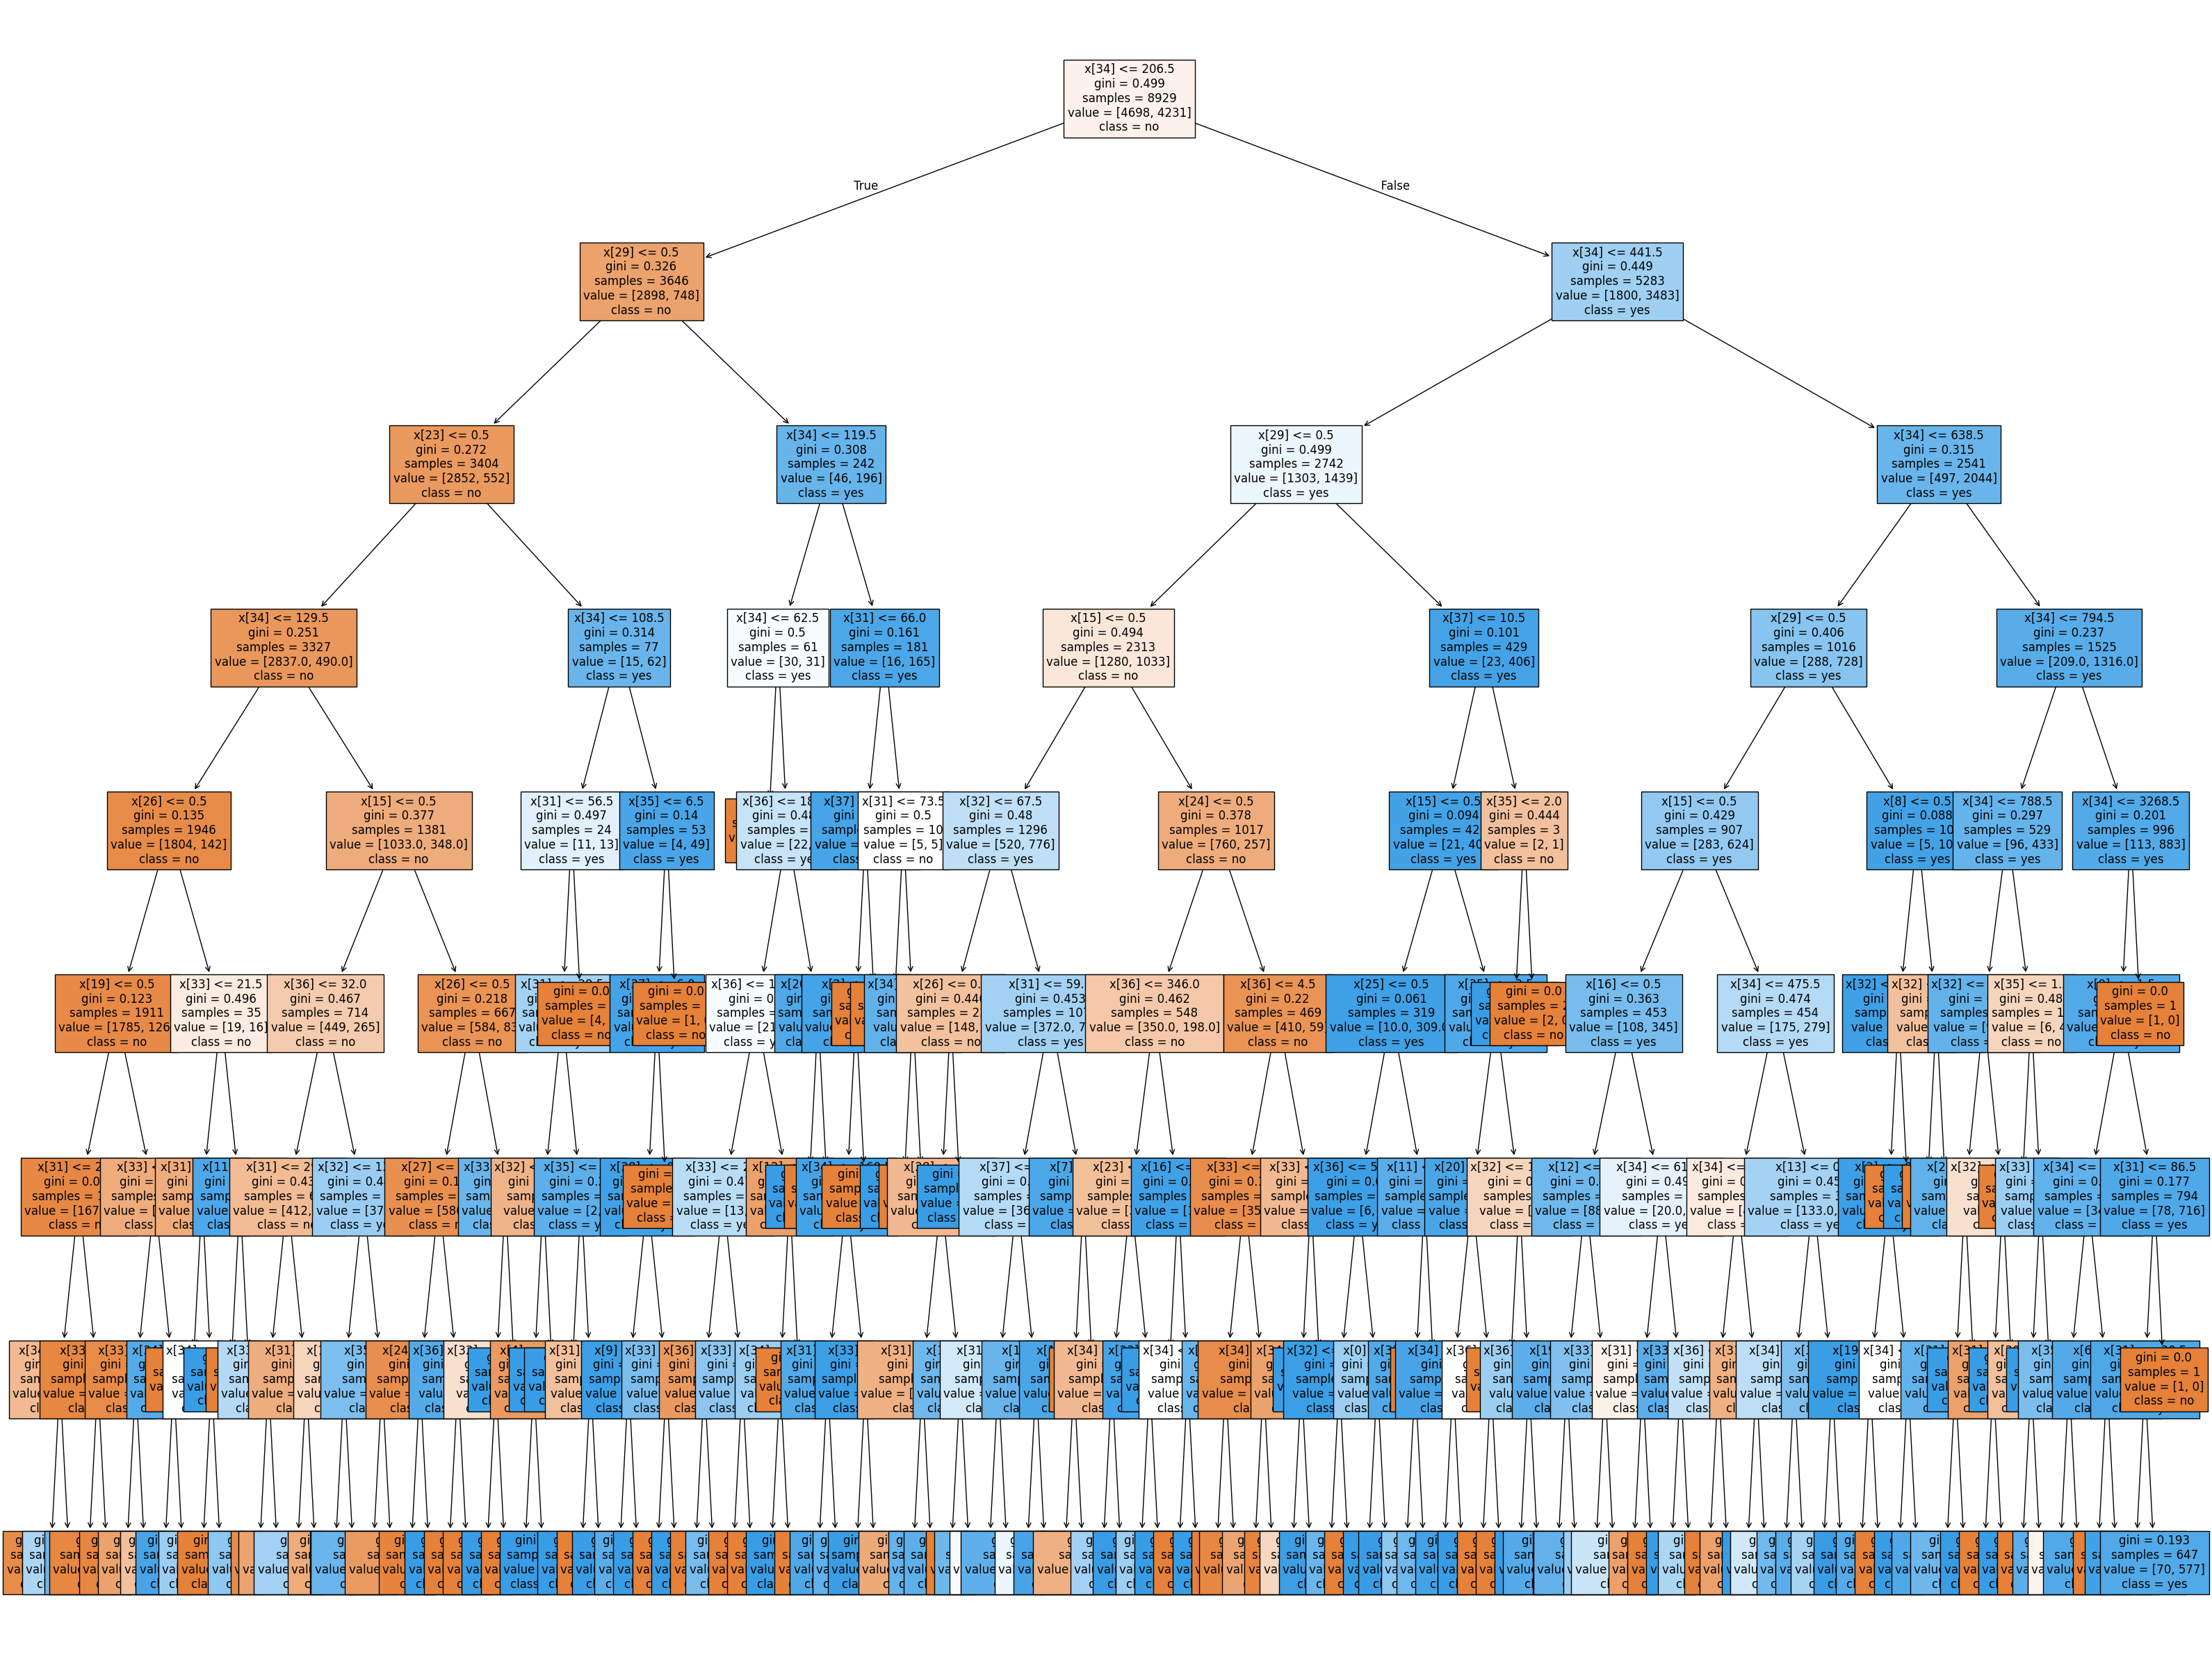

In [15]:
## YOUR CODE HERE

# set model as optimal hyperparameters
suitable_max_depth = gridcv.best_params_['max_depth']
suitable_criterion = gridcv.best_params_['criterion']
suitable_dt_model = DecisionTreeClassifier(random_state=42,
                                           max_depth=suitable_max_depth,
                                           criterion=suitable_criterion)
suitable_pipeline = make_pipeline(preprocess, suitable_dt_model)
suitable_pipeline.fit(bank_X_dev, bank_y_dev) # train using dev

plt.figure(figsize=(32,24))
plot_tree(suitable_pipeline.named_steps['decisiontreeclassifier'],
          class_names=[str(cls) for cls in label_encoder.classes_],
          filled=True,
          fontsize=12)
plt.tight_layout()

In [16]:
pred_dev = suitable_pipeline.predict(bank_X_dev)
pred_test = suitable_pipeline.predict(bank_X_test)

acc_dev = accuracy_score(bank_y_dev, pred_dev)
f1_dev = f1_score(bank_y_dev, pred_dev)
acc_test = accuracy_score(bank_y_test, pred_test)
f1_test = f1_score(bank_y_test, pred_test)

print("Performances of best-params")
print("Dev Acc:", acc_dev)
print("Dev f1 score:", f1_dev)
print("Test Acc:", acc_test)
print("Test f1 score:", f1_test)

Performances of best-params
Dev Acc: 0.8416396012991376
Dev f1 score: 0.8406940063091483
Test Acc: 0.7944469323779668
Test f1 score: 0.7937078651685393


**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

In [17]:
## YOUR CODE HERE

#-- pruning process --#
# build complete tree
base_dt_model = DecisionTreeClassifier(random_state=42)

pipe = make_pipeline(preprocess, base_dt_model)
pipe.fit(bank_X_train, bank_y_train)

# pruning path
bank_X_train_encoded = pipe.named_steps['columntransformer'].transform(bank_X_train)
base_dt = pipe.named_steps['decisiontreeclassifier'] # completly trained tree
path = base_dt.cost_complexity_pruning_path(bank_X_train_encoded, bank_y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# print(ccp_alphas, impurities)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

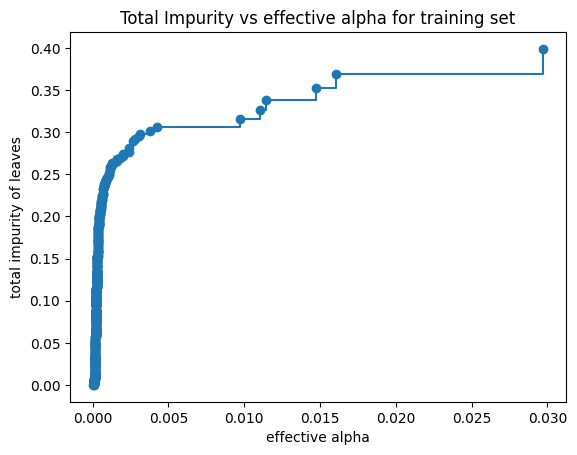

In [18]:
# plotting - references in scikit-learn documentation

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [19]:
# pruning

pruning_dt_process = []
acc_scores_train = []
acc_scores_val = []
f1_scores_train = []
f1_scores_val = []
alphas = []

for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    pipe = make_pipeline(preprocess, dt_model)
    pipe.fit(bank_X_train, bank_y_train)

    # score - train data
    pred_train = pipe.predict(bank_X_train)
    acc_train = accuracy_score(bank_y_train, pred_train)
    f1_train = f1_score(bank_y_train, pred_train)
    acc_scores_train.append(acc_train)
    f1_scores_train.append(f1_train)

    # score - validation data
    pred_val = pipe.predict(bank_X_val)
    acc_val = accuracy_score(bank_y_val, pred_val)
    f1_val = f1_score(bank_y_val, pred_val)
    acc_scores_val.append(acc_val)
    f1_scores_val.append(f1_val)

    alphas.append(ccp_alpha)
    pruning_dt_process.append(pipe.named_steps['decisiontreeclassifier'])

# print(pruning_dt_alphas)

In [20]:
# optimal pruning alphas & score

acc_scores_train = np.array(acc_scores_train)
f1_scores_train = np.array(f1_scores_train)
acc_scores_val = np.array(acc_scores_val)
f1_scores_val = np.array(f1_scores_val)

# pruning : using validation dataset
# using accuracy score
optimal_idx_acc = np.argmax(acc_scores_val)
optimal_alpha_acc = alphas[optimal_idx_acc]

optimal_score_train_acc = f1_scores_train[optimal_idx_acc]
optimal_score_val_acc = f1_scores_val[optimal_idx_acc]

print("Using Accuracy Score")
print("Optimal alpha:", optimal_alpha_acc)
print("Optimal Train Accuracy score:", optimal_score_train_acc)
print("Optimal Validation Accuracy score:", optimal_score_val_acc)


# using f1 score
optimal_idx = np.argmax(f1_scores_val)
optimal_alpha = alphas[optimal_idx]

optimal_score_train = f1_scores_train[optimal_idx]
optimal_score_val = f1_scores_val[optimal_idx]

print("\nUsing F1 Score")
print("Optimal alpha:", optimal_alpha)
print("Optimal Train F1 score:", optimal_score_train)
print("Optimal Validation F1 score:", optimal_score_val)

Using Accuracy Score
Optimal alpha: 0.0006269015521986657
Optimal Train Accuracy score: 0.8492942783426923
Optimal Validation Accuracy score: 0.8196420376319412

Using F1 Score
Optimal alpha: 0.0006269015521986657
Optimal Train F1 score: 0.8492942783426923
Optimal Validation F1 score: 0.8196420376319412


In [21]:
# predict using pruned decision tree model

pruned_dt_model = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pipe = make_pipeline(preprocess, pruned_dt_model)
pipe.fit(bank_X_dev, bank_y_dev)

pred_test = pipe.predict(bank_X_test)
acc_score_test = accuracy_score(bank_y_test, pred_test)
f1_score_test = f1_score(bank_y_test, pred_test)

print("Optimal alpha:", optimal_alpha)
print("Optimal Test Accuracy score:", acc_score_test)
print("Optimal Test F1 score:", f1_score_test)

Optimal alpha: 0.0006269015521986657
Optimal Test Accuracy score: 0.8132557098074339
Optimal Test F1 score: 0.8108843537414966


Q: Print the optimal value of the tuned parameter.

A: The optimal value of the tuned parameter (alpha) is 0.0006269015521986657. The corresponding test accuracy score is approximately 81.33%, and the F1 score is around 81.09%.

**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

[0.00288489 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.08039782 0.00341951 0.00697011
 0.         0.00711723 0.         0.005782   0.00243805 0.03380524
 0.01476889 0.         0.01880708 0.00725258 0.00591216 0.16405157
 0.         0.03756777 0.02496085 0.03902332 0.5155983  0.
 0.02115055 0.00809207]
--Top 3 most important features--
[Top 1] Feature: remainder__duration, Importance: 0.5155983007062072
[Top 2] Feature: onehotencoder__poutcome_success, Importance: 0.164051565488747
[Top 3] Feature: onehotencoder__housing_yes, Importance: 0.08039782361240272


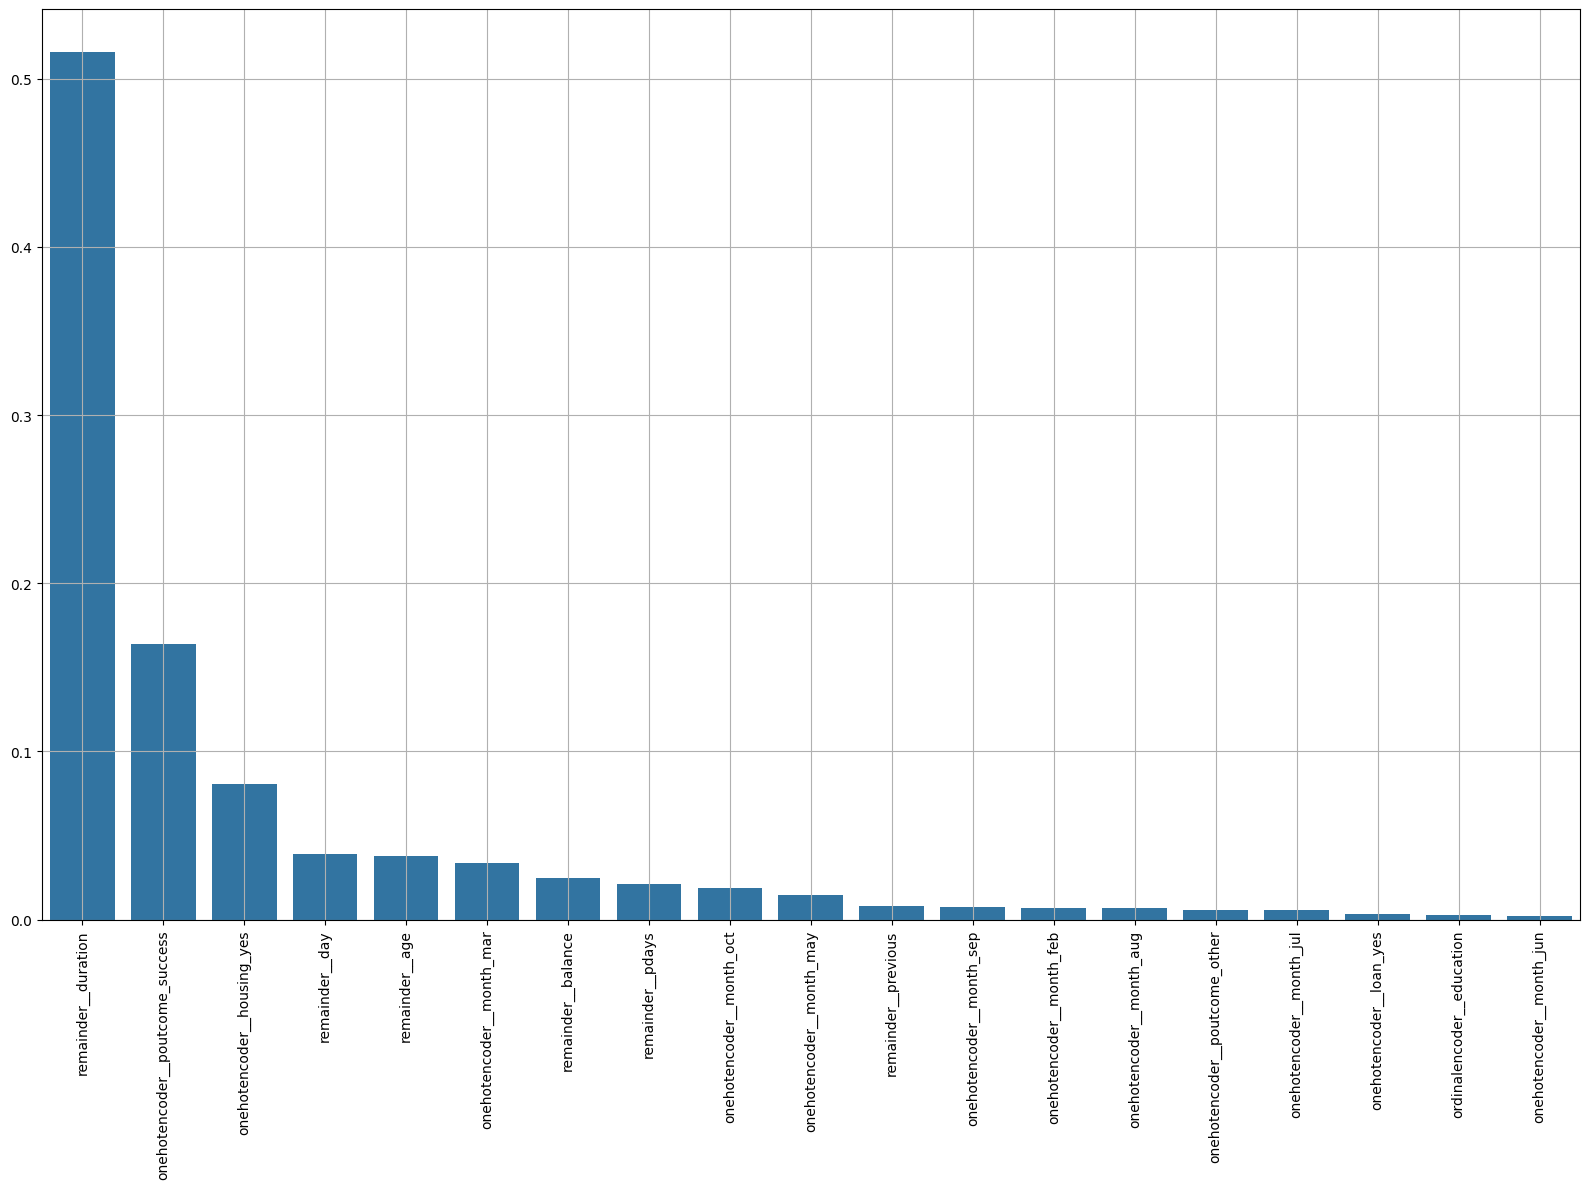

In [22]:
## YOUR CODE HERE

# define columns name
num_columns=['age','balance','day','duration','campaign','pdays','previous']
ord_columns = ['education']
oh_columns = ['job', 'marital', 'default', 'housing', 'loan', 'month', 'poutcome']
feature_names = num_columns + ord_columns + oh_columns

feature_importances = pipe.named_steps['decisiontreeclassifier'].feature_importances_
print(feature_importances)
# print(pipe.named_steps['columntransformer'].get_feature_names_out())
feature_names = pipe.named_steps['columntransformer'].get_feature_names_out()
fi_pairs = list(zip(feature_names, feature_importances))
feat, imps = zip(*sorted(list(filter(lambda x: x[1]!=0, fi_pairs)), key=lambda x:x[1], reverse=True))

top3_fi_pairs = zip(feat[:3], imps[:3])
print("--Top 3 most important features--")
rank = 1
for feature, imp_lev in top3_fi_pairs:
  print("[Top {}] Feature: {}, Importance: {}".format(rank, feature, imp_lev))
  rank+=1


plt.figure(figsize=(16,12))
sns.barplot(x=list(feat), y=list(imps))
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.tight_layout()


Q: List the top 3 most important features for this trained tree? How would you justify these features being the most important?

A: The top 3 most important features for this trained tree are 'duration', 'poutcome', and 'housing'. In tree-based models, feature importance is determined by how effectively a feature reduces impurity when the data is split at various nodes. Features that contribute significantly to reducing impurity are considered more important. This ranking of importance is justified by the fact that these features consistently contribute the most to splitting the data in a way that optimizes the model's predictive performance.
<!-- 'duration', 'poutcome', 'housing' features가 top3 most important features이다. Feature importance를 통해  feature importance는 tree-based model에서 전체 모델의 impurity를 reducing하는 방법으로 node 단계별 data를 split하는데 기여하는 feature이다. 따라서 feature importance가 높은 feature는 높은 중요도를 가진다는 것을 알 수 있다. 즉, 각 feature의 중요도를 확인해보았을 때, 'duration', 'age', 'day'가 가장 높게 나왔다. -->

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

In [23]:
## YOUR CODE HERE

# Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn.
# Use the default parameters.
rf_model = RandomForestClassifier()
pipe = make_pipeline(preprocess, rf_model)
pipe.fit(bank_X_dev, bank_y_dev)

# Evaluate the performance of the model on test dataset.
test_pred = pipe.predict(bank_X_test)

# Use accuracy and F1 score to evaluate.
acc_test = accuracy_score(bank_y_test, test_pred)
f1_test = f1_score(bank_y_test, test_pred)

print("Accuracy score in Test data:", acc_test)
print("F1 score in Test data:", f1_test)

# Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?


Accuracy score in Test data: 0.8437080161218092
F1 score in Test data: 0.8405664687071722


Q: Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?

A: In Q1.7, the Decision Tree had a test accuracy of approximately 77.25% and an F1 score of around 76.17%. In contrast, the Random Forest achieved a test accuracy of approximately 84.68% and an F1 score of about 84.34%. Therefore, the Random Forest performs better than the Decision Tree on the test dataset.
<!-- Q1.7의 decision tree의 test accuracy와 f1 score는 각각 약 77.25%와 약 76.17%이고, random forest 는 accuracy와 f1 score가 각각 약 84.56% 84.22%이다. 따라서 this perform better than Decision Tree on the test dataset. -->

**2.2: Do all trees in the trained random forest model have pure leaves? How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [24]:
## YOUR CODE HERE

# Do all trees in the trained random forest model have pure leaves?
estimators = pipe.named_steps['randomforestclassifier'].estimators_
bank_X_test_preprocessed = pipe.named_steps['columntransformer'].transform(bank_X_test)

pure_leaves = []
rf_scores = []

for rf_tree in estimators:
  leaf_nodes = rf_tree.tree_.children_left == -1 # leaf nodes
  impurities = rf_tree.tree_.impurity[leaf_nodes]
  pure_check = all(impurity == 0 for impurity in impurities)
  # pure_check = np.all(rf_tree.tree_.impurity[leaf_nodes] == 0)
  pure_leaves.append(pure_check)

  rf_pred = rf_tree.predict(bank_X_test_preprocessed)
  rf_acc = accuracy_score(bank_y_test, rf_pred)
  rf_scores.append(rf_acc)

print("Do all trees in the trained random forest model have pure leaves?:", np.all(pure_leaves))
print("mean accuracy values:", np.mean(rf_scores))


Do all trees in the trained random forest model have pure leaves?: True
mean accuracy values: 0.7464845499328256


Q: Do all trees in the trained random forest model have pure leaves? How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method

A: To verify if the leaves are pure, we would need to check the impurity of the leaf nodes in each individual tree. If all leaf nodes in a tree have an impurity of 0, it means that the tree has pure leaves. A leaf node is considered pure if it has no children and its impurity is 0.

The result shows that all trees in the trained Random Forest model have pure leaves: **True**. The mean accuracy value is around **0.7454**.

<!-- randomforest의 estimator 중 tree의 children을 확인해보면 leaf node가 pure leaves인지 알 수 있다. leaf node는 tree의 마지막 node로 children이 없고, impurity가 0이면 pure leaf이다.  -->

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [25]:
## YOUR SOLUTION HERE >> Below!

I would choose '**n_estimators**' and '**max_depth**' hyperparameters that I could tune to improve their performance.

1. **n_estimators** indicates the number of trees in the forest.
Because the final prediction of the random forest model is average value of sub-trees' performance, increasing the number of trees helps the model to improve overall model's performance. This also can make the model more general and prevent overfitting.
2. **max_depth** indicates the maximum depth of the tree.
The deeper the tree's depth is, the higher complexity the model can have. This also means that the patterns the model can learn are higher and capture more complex data's patterns. However, this can result in overfitting, so the optimal max_depth would be found.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [26]:
## YOUR SOLUTION HERE >> Below!

In the case of **n_estimators**, the default value is 100. Therefore, I would choose five values based on this default: 25, 50, 100, 200, and 300. These values allow me to explore a range from fewer estimators(-which would reduce overfitting) to a higher number of estimators (-which could improve performance by averaging more trees).

For **max_depth**, the default value is None, which allows the trees to grow until all leaves are pure (or contain less than the minimum samples required). In Q 2.2, I observed that when max_depth was set to the default (None), all leaf nodes reached purity. Therefore, to explore different depths and control tree growth, I would select 3, 5, 8, 10, and 12. In Question 1, the optimal max_depth for the Decision Tree was 8, so I would adjust the depths around this value, ranging from 1 to 15, to prevent overfitting while allowing the model to capture deeper patterns in the data.
<!-- 따라서, default 값인 None을 포함하여 5, 10, 15, 20으로 설정할 것이다. Question 1의 Decision Tree에서 optimal max_depth가 9였기 때문에, n_estimator처럼 많이 늘리는 것은 Overfitting을 초래할 것 같아, 5씩 늘리며 하이퍼파라미터 조정을 할 것이다. -->

**2.5: Perform model selection using the chosen values for the hyperparameters. Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [27]:
## YOUR CODE HERE
n_estimators = [25, 50, 100, 200, 300]
max_depths = [3, 5, 8, 10, 12]
oob_scores = []
dev_scores = []
test_scores = []
best_oob_score = 0
best_params = None

for estimator in n_estimators:
  for depth in max_depths:
    search_rf_model = RandomForestClassifier(random_state=42, oob_score=True,
                                      n_estimators=estimator, max_depth=depth)
    pipe = make_pipeline(preprocess, search_rf_model)
    pipe.fit(bank_X_dev, bank_y_dev)

    dev_scores.append(pipe.score(bank_X_dev, bank_y_dev))
    test_scores.append(pipe.score(bank_X_test, bank_y_test))
    rf = pipe.named_steps['randomforestclassifier']
    oob_score = rf.oob_score_
    oob_scores.append(oob_score)

    if oob_score > best_oob_score:
      best_oob_score = oob_score
      best_params={'n_estimators': estimator,
                    'max_depth': depth}

print("\n Best hyper-parameter")
print("Best OOB score:", best_oob_score)
print("Best hyper-parameter:", best_params)


 Best hyper-parameter
Best OOB score: 0.836487848583268
Best hyper-parameter: {'n_estimators': 200, 'max_depth': 12}


In [28]:
best_rf_model = RandomForestClassifier(random_state=42, oob_score=True,
                                           **best_params)
best_pipeline = make_pipeline(preprocess, best_rf_model)
best_pipeline.fit(bank_X_dev, bank_y_dev)

pred_dev = best_pipeline.predict(bank_X_dev)
pred_test = best_pipeline.predict(bank_X_test)

acc_dev = accuracy_score(bank_y_dev, pred_dev)
f1_dev = f1_score(bank_y_dev, pred_dev)
acc_test = accuracy_score(bank_y_test, pred_test)
f1_test = f1_score(bank_y_test, pred_test)

print("Performances of best-params")
print("Dev Acc:", acc_dev)
print("Dev f1 score:", f1_dev)
print("Test Acc:", acc_test)
print("Test f1 score:", f1_test)

Performances of best-params
Dev Acc: 0.8990928435435099
Dev f1 score: 0.8953663918244107
Test Acc: 0.8401253918495298
Test f1 score: 0.8361633776961909


Q: Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?

A: The optimal hyperparameters derived from hyperparameter tuning were n_estimators = 200, and max_depth = 12. The performance of the model trained with theses optimal hyperparameters on the development and test datasets is as below:
- Development dataset: 89.91% (Accuracy Score), 89.54% (F1 score)
- Test dataset: 84.01% (Accuracy Score), 83.62% (F1 score)

When compared to the plain-vanilla random forest model from Q2.1, which achieved a test accuracy of around 84.59% and F1 score of 84.22%, the performance of the hyperparameter-tuned model is slightly lower on the test dataset.

 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**

--Top 3 most important features--
[Top 1] Feature: remainder__duration, Importance: 0.43637500672365304
[Top 2] Feature: onehotencoder__poutcome_success, Importance: 0.0630283881300016
[Top 3] Feature: remainder__age, Importance: 0.06261982331894034


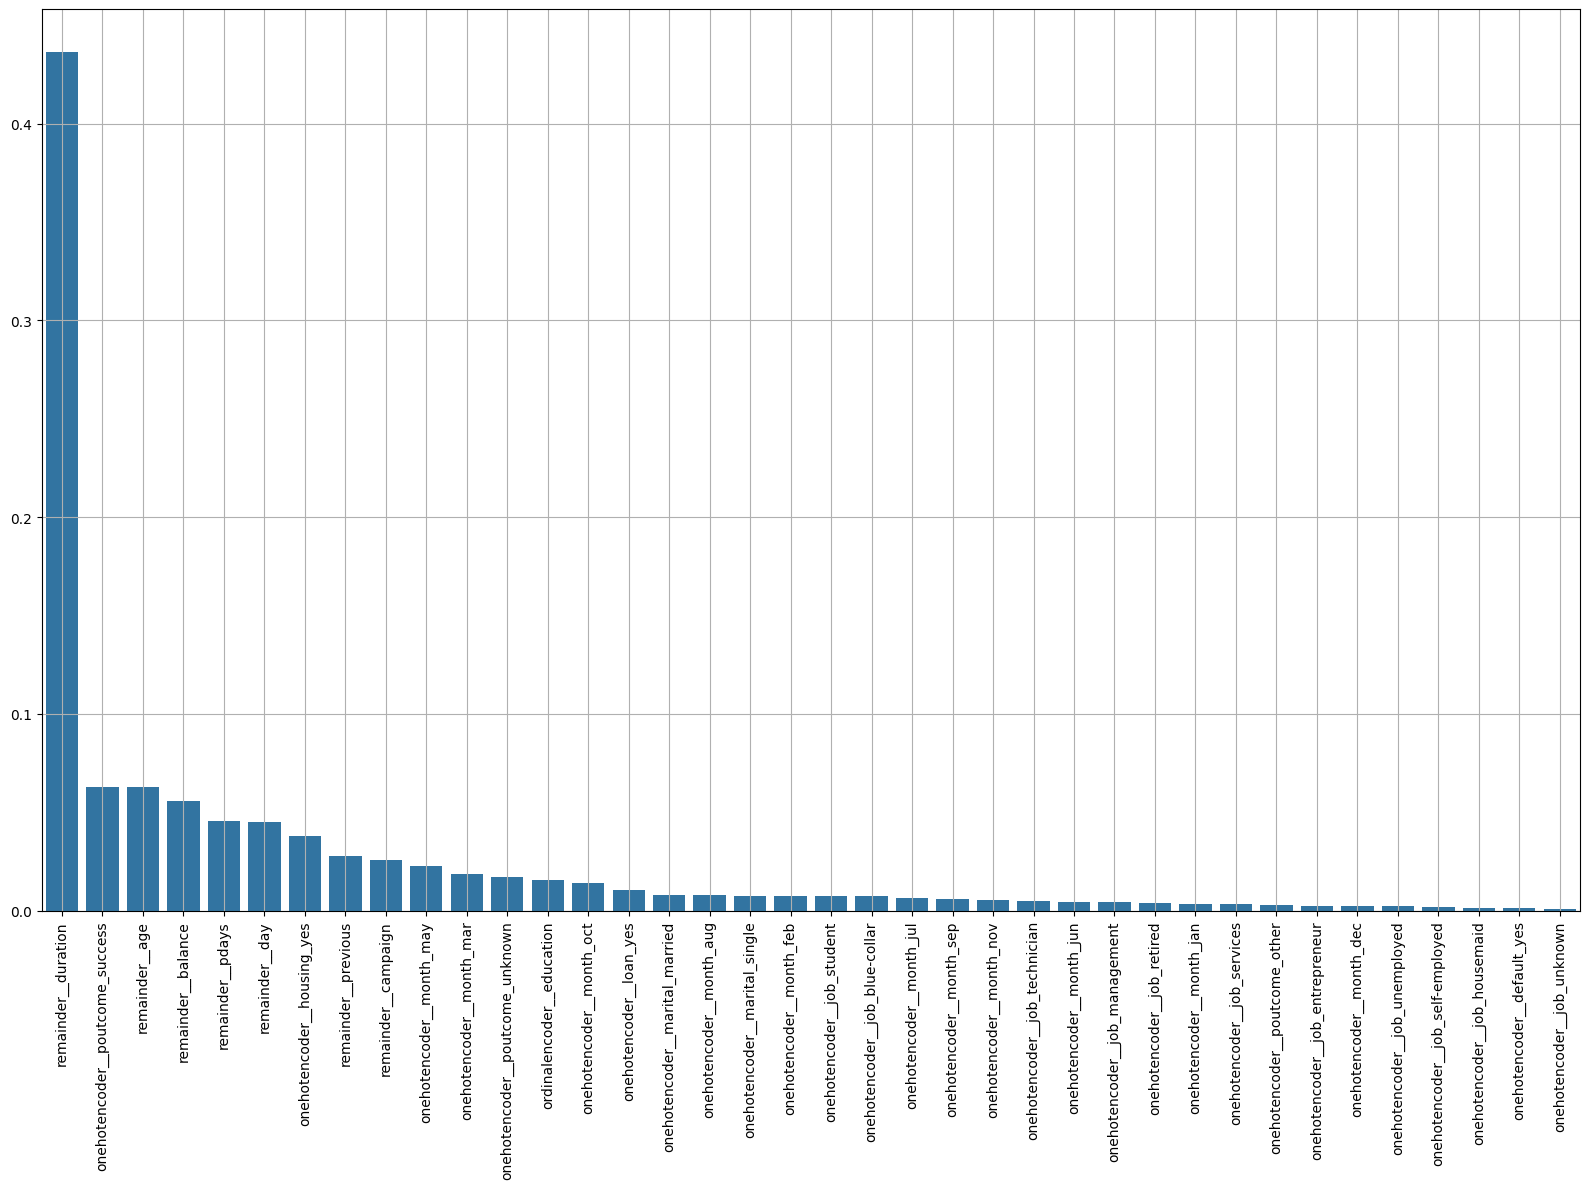

In [29]:
## YOUR CODE HERE
# num_columns=['age','balance','day','duration','campaign','pdays','previous']
# ord_columns = ['education']
# oh_columns = ['job', 'marital', 'default', 'housing', 'loan', 'month', 'poutcome']
# feature_names = num_columns + ord_columns + oh_columns

feature_importances = best_rf_model.feature_importances_
feature_names = pipe.named_steps['columntransformer'].get_feature_names_out()
fi_pairs = list(zip(feature_names, feature_importances))
feat, imps = zip(*sorted(list(filter(lambda x: x[1]!=0, fi_pairs)), key=lambda x:x[1], reverse=True))

top3_fi_pairs = zip(feat[:3], imps[:3])
print("--Top 3 most important features--")
rank = 1
for feature, imp_lev in top3_fi_pairs:
  print("[Top {}] Feature: {}, Importance: {}".format(rank, feature, imp_lev))
  rank+=1


plt.figure(figsize=(16,12))
sns.barplot(x=list(feat), y=list(imps))
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.tight_layout()

Q: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?

A: In Q.1.10, the top 3 most important features from the Decision Tree model are '**duration**', '**poutcome**', and '**housing**'.
And In Q2.6, the top 3 most important features from the Random Forest model are slightly different: '**duration**', '**poutcome**', and '**age**'.

Both models agree that '**duration**' and '**poutcome**' are key features, however, the decision tree model ranked '**housing**' as more important, whereas the Random Forest model identified '**age**' as more important.

As seen in Q2.5, the Decision Tree model had slightly better test performance compared to the Random Forest model. However, Random Forests are typically better at generalizing to unseen data because they average across multiple trees, mitigating overfitting. Although the Random Forest model's test performance was slightly lower, the difference was minimal. Given this, I think that the feature importance results from the Random Forest model likely make more sense, as Random Forests typically provide more reliable estimates of feature importance by considering multiple trees. Therefore, **despite the minor performance difference, the Random Forest's feature importance set would be considered more robust**.

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [30]:
## YOUR CODE HERE

learning_rate = [0.01, 0.1, 0.2]
max_iter = [50, 100, 250]
max_depth = [None, 3, 7]
hyper_parameter = {'max_iter': max_iter,
                   'learning_rate': learning_rate,
                   'max_depth': max_depth}

hgb_model = HistGradientBoostingClassifier(random_state=42)

search_hgb_model = GridSearchCV(hgb_model, hyper_parameter,
                                cv=5, scoring = 'f1',
                                verbose=1, n_jobs=-1,
                                return_train_score=True)

pipe1 = make_pipeline(preprocess, search_hgb_model)

start = time.time()
pipe1.fit(bank_X_dev, bank_y_dev)
end = time.time()

pred_dev = pipe1.predict(bank_X_dev)
pred_test = pipe1.predict(bank_X_test)

acc_dev = accuracy_score(bank_y_dev, pred_dev)
f1_dev = f1_score(bank_y_dev, pred_dev)
acc_test = accuracy_score(bank_y_test, pred_test)
f1_test = f1_score(bank_y_test, pred_test)


print("dev Acc:", acc_dev)
print("dev f1 score:", f1_dev)
print("test Acc:", acc_test)
print("test f1 score:", f1_test)

print("\n Suitable hyper parameter")
gridcv = pipe1.named_steps['gridsearchcv']
print("Best Score:", gridcv.best_score_)
print("Best params:", gridcv.best_params_)

duration_time = end - start
print("Time taken to do model selection: {} seconds".format(duration_time))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
dev Acc: 0.8948370478217046
dev f1 score: 0.8916830084208098
test Acc: 0.8540080609046127
test f1 score: 0.8487940630797773

 Suitable hyper parameter
Best Score: 0.8456528349123766
Best params: {'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 100}
Time taken to do model selection: 96.56756114959717 seconds


In [31]:
best_hgb_params = gridcv.best_params_
best_hgb_model = HistGradientBoostingClassifier(random_state=42,
                                        max_iter=best_hgb_params['max_iter'],
                                        learning_rate=best_hgb_params['learning_rate'],
                                        max_depth=best_hgb_params['max_depth'])
pipe = make_pipeline(preprocess, best_hgb_model)
pipe.fit(bank_X_dev, bank_y_dev)

pred_test = pipe.predict(bank_X_test)
f1_score_test = f1_score(bank_y_test, pred_test)

print("Optimal Test F1 score:", f1_score_test)

Optimal Test F1 score: 0.8487940630797773


For the **HistGradientBoostingClassifier**, the time taken for model selection was approximately 136.3932 seconds. The best hyperparameters identified were learning rate of 0.1, max_depth of 7, and max_iter to 100. The performance of the test dataset using the optimal model achieved f1 score of approximately 84.88%.

**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT HAVE TO** choose the same hyperparameters as HistGradientBoostingClassifier.

In [32]:
## YOUR CODE HERE

n_estimators = [50, 100, 250]
subsample = [0.1, 0.5, 1.0] # range (0.0, 1.0]
gamma = [0.1, 0.3, 0.5]
hyper_parameter = {'n_estimators': n_estimators,
                   'subsample': subsample,
                    'gamma': gamma}

xgb_model = XGBClassifier(random_state=42)

search_xgb_model = GridSearchCV(xgb_model, hyper_parameter,
                                cv=5, scoring = 'f1',
                                verbose=1, n_jobs=-1,
                                return_train_score=True)

pipe2 = make_pipeline(preprocess, search_xgb_model)

start = time.time()
pipe2.fit(bank_X_dev, bank_y_dev)
end = time.time()

pred_dev = pipe2.predict(bank_X_dev)
pred_test = pipe2.predict(bank_X_test)

acc_dev = accuracy_score(bank_y_dev, pred_dev)
f1_dev = f1_score(bank_y_dev, pred_dev)
acc_test = accuracy_score(bank_y_test, pred_test)
f1_test = f1_score(bank_y_test, pred_test)


print("dev Acc:", acc_dev)
print("dev f1 score:", f1_dev)
print("test Acc:", acc_test)
print("test f1 score:", f1_test)

print("\n Suitable hyper parameter")
gridcv = pipe2.named_steps['gridsearchcv']
print("Best Score:", gridcv.best_score_)
print("Best params:", gridcv.best_params_)

duration_time = end - start
print("Time taken to do model selection: {} seconds".format(duration_time))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
dev Acc: 0.9272034942322769
dev f1 score: 0.9244010234938358
test Acc: 0.8504254366323332
test f1 score: 0.8457987072945522

 Suitable hyper parameter
Best Score: 0.8452009846844915
Best params: {'gamma': 0.3, 'n_estimators': 100, 'subsample': 1.0}
Time taken to do model selection: 39.13067030906677 seconds


In [33]:
best_xgb_params = gridcv.best_params_
best_xgb_model = XGBClassifier(random_state=42,
                              n_estimators=best_xgb_params['n_estimators'],
                              subsample=best_xgb_params['subsample'],
                              gamma=best_xgb_params['gamma'])
pipe = make_pipeline(preprocess, best_xgb_model)
pipe.fit(bank_X_dev, bank_y_dev)

pred_test = pipe.predict(bank_X_test)
f1_score_test = f1_score(bank_y_test, pred_test)

print("Optimal Test F1 score:", f1_score_test)

Optimal Test F1 score: 0.8457987072945522


For the **XGBoost**, the time taken for model selection was approximately 42.8875 seconds. The best hyperparameters identified were gamma of 0.3, n_estimators of 100, and subsample of 1.0. The performance of the test dataset using the optimal model achieved f1 score of approximately 84.58%.

**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

The performance on the test dataset shows that the HistGradientBoostingClassifier achieved an F1 score of 84.88%, while XGBoost achieved an F1 score of 84.58%. Although the performance of HistGradientBoostingClassifier is slightly better, the difference is minimal (0.3%). However, in terms of time efficiency, XGBoost is significantly faster, taking only 42.89 seconds for model selection compared to 136.39 seconds for HistGradientBoostingClassifier. This means that XGBoost is approximately 3 times faster. Given these factors, I would prefer **XGBoost** in this scenario due to its much faster model selection time and only a marginally lower F1 score.

**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

--Top 3 most important features--
[Top 1] Feature: onehotencoder__poutcome_success, Importance: 0.1816442757844925
[Top 2] Feature: onehotencoder__month_mar, Importance: 0.08009281754493713
[Top 3] Feature: onehotencoder__housing_yes, Importance: 0.06608352065086365


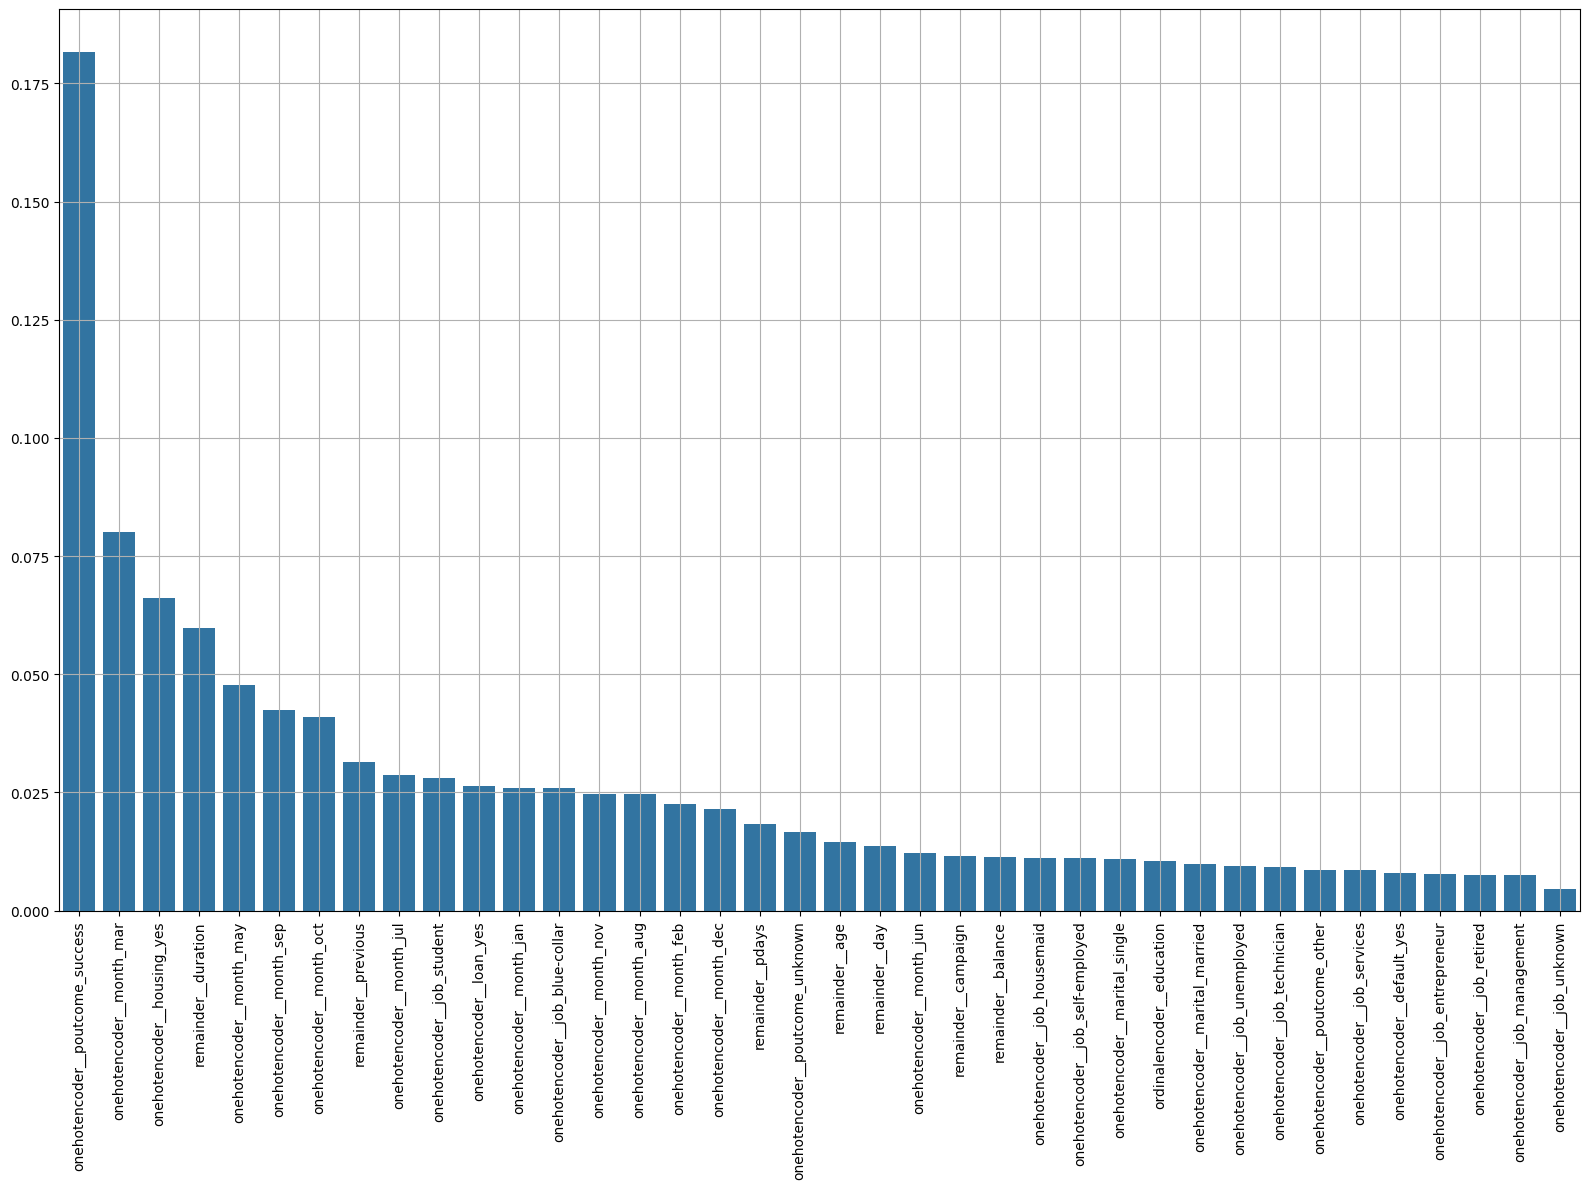

In [34]:
## YOUR CODE HERE
# num_columns=['age','balance','day','duration','campaign','pdays','previous']
# ord_columns = ['education']
# oh_columns = ['job', 'marital', 'default', 'housing', 'loan', 'month', 'poutcome']
# feature_names = num_columns + ord_columns + oh_columns

feature_importances = best_xgb_model.feature_importances_
feature_names = pipe.named_steps['columntransformer'].get_feature_names_out()
fi_pairs = list(zip(feature_names, feature_importances))
feat, imps = zip(*sorted(list(filter(lambda x: x[1]!=0, fi_pairs)), key=lambda x:x[1], reverse=True))

top3_fi_pairs = zip(feat[:3], imps[:3])
print("--Top 3 most important features--")
rank = 1
for feature, imp_lev in top3_fi_pairs:
  print("[Top {}] Feature: {}, Importance: {}".format(rank, feature, imp_lev))
  rank+=1


plt.figure(figsize=(16,12))
sns.barplot(x=list(feat), y=list(imps))
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.tight_layout()

Q: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?


A: According to Q1.10 for Decision tree, the top 3 important features are '**duration**', '**poutcome**', and '**housing**'. From the Random Forest model, the top 3 most important features are '**duration**', '**poutcome**', and '**age**'. In the XGBoost model, the top 3 most important features are '**poutcome**', '**month**', and '**housing**.

All three models consistently highlight '**poutcome**' as one of the most important features. Both the Decision Tree and XGBoost models include '**housing**' in their top features, however, for the third feature, the Decision tree selects '**duration**' while XGBoost identifies '**month**' as important. Comparing Random Forest and XGBoost, they both agree on '**poutcome**', but Random Forest emphasizes '**housing**' and '**duration**', whereas XGBoost highlights '**month**' and '**housing**'.

**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

5 top feature importance: ['poutcome', 'month', 'housing', 'duration', 'previous']

In [35]:
top5_features = ['poutcome', 'month', 'housing', 'duration', 'previous']
print(top5_features)

bank_X_dev_top5 = bank_X_dev[top5_features]
bank_X_test_top5 = bank_X_test[top5_features]

label_encoder = LabelEncoder()
bank_y_dev = label_encoder.fit_transform(bank_y_dev)
bank_y_test = label_encoder.transform(bank_y_test)

print(bank_X_dev_top5.head())

num_columns=['duration', 'previous']

# one hot encoding
oh_columns = ['housing','poutcome', 'month']
oh_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

preprocess_top5 = make_column_transformer((oh_encoder, oh_columns),
                                     remainder='passthrough')

['poutcome', 'month', 'housing', 'duration', 'previous']
     poutcome month housing  duration  previous
8644  unknown   jul      no       251         0
2632  success   sep      no       260         8
3056  success   jan      no       202         1
1080  unknown   nov     yes       775         0
4006  unknown   sep      no       272         0


In [36]:
n_estimators = [50, 100, 250]
subsample = [0.1, 0.5, 1.0] # range (0.0, 1.0]
gamma = [0.1, 0.3, 0.5]
hyper_parameter = {'n_estimators': n_estimators,
                   'subsample': subsample,
                    'gamma': gamma}

top5_xgb_model = XGBClassifier(random_state=42)

search_top5_xgb_model = GridSearchCV(top5_xgb_model, hyper_parameter,
                                     cv=5, scoring = 'f1',
                                    verbose=1, n_jobs=-1,
                                    return_train_score=True)

pipe2 = make_pipeline(preprocess_top5, search_top5_xgb_model)

start=time.time()
pipe2.fit(bank_X_dev_top5, bank_y_dev)
end=time.time()

pred_dev = pipe2.predict(bank_X_dev_top5)
pred_test = pipe2.predict(bank_X_test_top5)

acc_dev = accuracy_score(bank_y_dev, pred_dev)
f1_dev = f1_score(bank_y_dev, pred_dev)
acc_test = accuracy_score(bank_y_test, pred_test)
f1_test = f1_score(bank_y_test, pred_test)


print("dev Acc:", acc_dev)
print("dev f1 score:", f1_dev)
print("test Acc:", acc_test)
print("test f1 score:", f1_test)

print("\n Suitable hyper parameter")
gridcv = pipe2.named_steps['gridsearchcv']
print("Best Score:", gridcv.best_score_)
print("Best params:", gridcv.best_params_)

duration_time = end - start
print("Time taken to do model selection: {} seconds".format(duration_time))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
dev Acc: 0.8349199238436555
dev f1 score: 0.8305747126436782
test Acc: 0.8199731303179579
test f1 score: 0.8145756457564576

 Suitable hyper parameter
Best Score: 0.8138338604045838
Best params: {'gamma': 0.5, 'n_estimators': 50, 'subsample': 1.0}
Time taken to do model selection: 25.66676902770996 seconds


In [37]:
best_top5_xgb_params = gridcv.best_params_
print(best_top5_xgb_params)
best_top5_xgb_model = XGBClassifier(random_state=42,
                              n_estimators=best_top5_xgb_params['n_estimators'],
                              subsample=best_top5_xgb_params['subsample'],
                              gamma=best_top5_xgb_params['gamma'])
pipe = make_pipeline(preprocess, best_top5_xgb_model)
pipe.fit(bank_X_dev, bank_y_dev)

pred_test = pipe.predict(bank_X_test)
f1_score_test = f1_score(bank_y_test, pred_test)

print("Optimal Test F1 score:", f1_score_test)

{'gamma': 0.5, 'n_estimators': 50, 'subsample': 1.0}
Optimal Test F1 score: 0.8514576584914392


For the **XGBoost** trained by the top 5 features, the time taken for model selection was approximately 33.0011 seconds. The best hyperparameters identified were gamma of 0.5, n_estimators of 50, and subsample of 1.0. The performance of the test dataset using the optimal model achieved f1 score of approximately 85.15%.

Q: Why or why not is the performance better?

A: When comparing the two models-one trained with all features and one trained with only the top 5 features using XGBoost-several factors contribute to the differences in performance and time efficiency.

The time taken for model selection with XGBoost using all features was approximately 42.89 seconds, while the model trained with only the top 5 features took approximately 33.00 seconds. This indicates that the model trained with the top 5 features is more time-efficient, reducing the selection time by about 23%.

In terms of model performance, the XGBoost model trained with all features achieved an F1 score of approximately 84.58%, whereas the model trained with only the top 5 features achieved a slightly higher F1 socre of approximately 85.15%. This shows that not only did the model trained with fewer features improve time efficiency, but it also performed slightly better in terms of predictive performance.

Consequently, **considering both time efficiency and model performance, the XGBoost model trained with the top 5 features is better than the model trained with all features**.

## Question 4: Calibration

: I don't have to do this part, but I have already solved it. Just submitting it...

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [38]:
## YOUR CODE HERE

# use the XGBoost model trained from Question 3.2
pipe = make_pipeline(preprocess, best_xgb_model) # Q 3.2
pred_prob_test = pipe.predict_proba(bank_X_test)
print(pred_prob_test) # (n_samples, n_classes)

# brier score loss: smaller means good (select only n_classes)
brier = brier_score_loss(bank_y_test, pred_prob_test[:, 1])

print("Brier Score for the XGBoost model:", brier)

[[0.65084493 0.3491551 ]
 [0.18237615 0.81762385]
 [0.09765422 0.9023458 ]
 ...
 [0.35820287 0.6417971 ]
 [0.37088257 0.6291174 ]
 [0.05174369 0.9482563 ]]
Brier Score for the XGBoost model: 0.10974453031436798


**4.2: Calibrate the trained XGBoost model using isotonic regression. Print the brier score after calibration and plot predicted v.s. actual on test datasets from the calibration method.**

In [39]:
## YOUR CODE HERE
# calibration
# - CalibratedClassifierCV: Probability calibration with isotonic regression or logistic regression.

# set 'cv' hyperparameter to 'prefit', meaning that the model has been already trained
calibrated_xgb_model = CalibratedClassifierCV(best_xgb_model, method='isotonic', cv='prefit') # already train
calibrated_pipe = make_pipeline(preprocess, calibrated_xgb_model)

calibrated_pipe.fit(bank_X_dev, bank_y_dev)
calibrated_pred_prob_test = calibrated_pipe.predict_proba(bank_X_test)
print(calibrated_pred_prob_test) # (n_samples, n_classes)

# brier score loss: smaller means good
calibrated_brier = brier_score_loss(bank_y_test, calibrated_pred_prob_test[:, 1])

print("Brier Score for the Calibrated XGBoost model:", calibrated_brier)

[[0.72448981 0.27551019]
 [0.05312502 0.94687498]
 [0.00418413 0.99581587]
 ...
 [0.30434781 0.69565219]
 [0.40217394 0.59782606]
 [0.         1.        ]]
Brier Score for the Calibrated XGBoost model: 0.11829555300584994


(2233,)
(2233,)
[0.04604486 0.17857143 0.375      0.36065574 0.28571429 0.50877193
 0.36842105 0.56666667 1.         0.70212766 0.58333333 1.
 0.71052632 0.73170732 0.69047619 0.86538462 0.76190476 0.89048991]
[0.00744509 0.08350682 0.13770605 0.19316482 0.22071846 0.27881908
 0.30487806 0.42469945 0.5        0.53895641 0.58725844 0.60000002
 0.69565219 0.73367092 0.82260598 0.89194915 0.94687498 0.99273659]


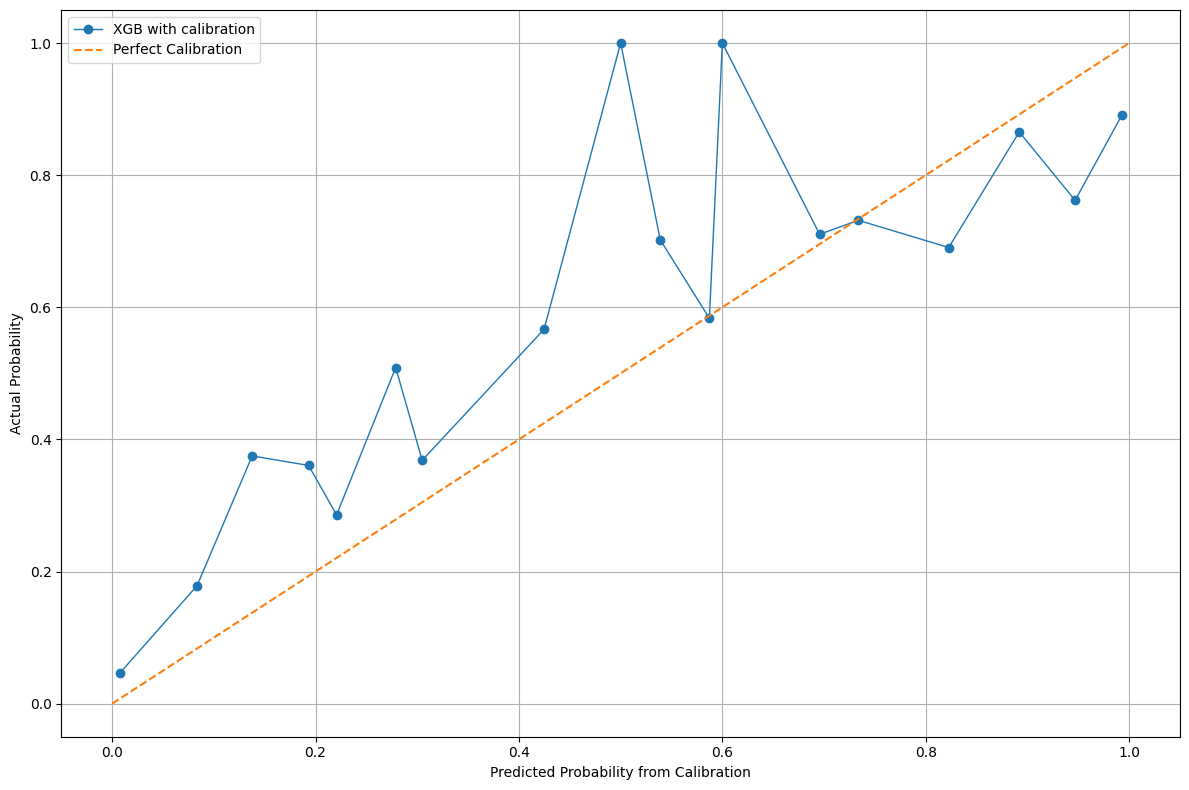

In [40]:
# plotting - calibration_curve
# bank_y_test: actual outcomes
# calibrated_pred_prob_test[:, 1]

print(bank_y_test.shape)
print(calibrated_pred_prob_test[:,1].shape)

plt.figure(figsize=(12,8))
actual_pos, pred_pos = calibration_curve(bank_y_test, calibrated_pred_prob_test[:, 1], n_bins=20)
print(actual_pos)
print(pred_pos)
plt.plot(pred_pos, actual_pos, marker='o', linestyle='-', linewidth=1, label="XGB with calibration")
plt.plot([0, 1], [0, 1], '--', label="Perfect Calibration") # means perfectly calibrated

plt.xlabel("Predicted Probability from Calibration")
plt.ylabel("Actual Probability")
plt.legend()
plt.grid()
plt.tight_layout()

**4.3: Compare the brier scores from 4.1 and 4.2. Do the calibration methods help in having better predicted probabilities?**

Your Comments Here